# **SELECCIÓN DE CLIENTES BASE FOCO (PREPARACIÓN DE DATOS)**
Cristian Bolaños

Mateo Cabarcas

## **1. IMPORTAR LIBRERIAS**

In [174]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis, mode

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## **2. CARGA DEL DATASET**

In [175]:
#El dataset se encuentra cargado en un repositorio de github,
#Se usa la función !git clone para hacer una copia local del repositorio
#y así poder llamar los datos posteriormente

! git clone https://github.com/MateoCa0397/Monografia-udea.git

fatal: destination path 'Monografia-udea' already exists and is not an empty directory.


In [176]:
import pandas as pd
df = pd.read_csv('/content/Monografia-udea/Dataset/BASE FOCO ANDES.csv', sep=';', on_bad_lines='skip') # sep=';' for semicolon, sep='\t' for tab

df.head()


,Conteo,CodigoCliente,Regional,CodigoGerencia,Gerencia,UN,UnidadNegocio,CodigoZona_Principal,Cliente,LongitudVentas,...,Cob 473,Cob Bi 473,Cob RB 3XX,Cob Bi RB 3XX,Cob Bi BP,Cob Costeña Gris,Cob Costeña gris 330,Cob Costeña gris 750,CA Costeña 330,CA Costeña 750
0,1,13853071,CO Andes,C62,CO GC Antquia Pblciones,2W,CO LV MXRU-Ganadera,COM341,Kiarangel,"-74,65036971",...,0,0,0,0,0,0,0,0,0,0
1,1,13853753,CO Andes,C62,CO GC Antquia Pblciones,2W,CO LV MXRU-Ganadera,COM341,Supermercado El Horizonte,"-74,67853563",...,0,0,0,0,0,0,0,0,0,0
2,1,13854748,CO Andes,C62,CO GC Antquia Pblciones,2W,CO LV MXRU-Ganadera,COM341,Tiendesita La Mona,"-74,67512152",...,0,0,0,0,1,0,0,0,0,0
3,1,13858403,CO Andes,C62,CO GC Antquia Pblciones,2W,CO LV MXRU-Ganadera,COM341,Billar y Cafeteria Bull Terrier,"-74,67710149",...,0,0,0,0,0,0,0,0,0,0
4,1,13810729,CO Andes,C60,CO GC Medellín,66,CO SV MXUR Sur Occ,COM6E8,Kiosko Verde,"-75,6228319",...,0,0,0,0,0,0,0,0,0,0


## **3. LIMPIEZA DE DATOS**

**ELIMINACIÓN DE COLUMNAS**

In [177]:
#Primero se eliminan las columnas que no aportan información al modelo
#y solo son descriptivas de cada cliente (Código, subcanal, gerencia, regional, entre otras)
#Además, se eliminan variables que están repetidas y variables que brindan información
#Sobre la categoría de maltas que no es el foco de este estudio

df.drop(['Conteo','CodigoCliente','Regional','CodigoGerencia',
         'Gerencia','UN','UnidadNegocio','CodigoZona_Principal',
         'Cliente','LongitudVentas','LatitudVentas','Barrio',
         'Direccion','Departamento','Municipio','CodigoSubCanal','SubCanal', 'Atributo4',
         'Visita','Supervisor','Encuesta Interna','El PDV vende productos de otras compañías? (Cerveza - Malta)',
         'Productos diferentes ABI total','El PDV vende Natumalta?','Vende Natumalta',
         'DN Nabs','DN Pony RB','DN Leona','DN BI Pony','Pony M RB 330 +Leona','Bi Pony + Leona',
         'Cob 473','Cob Bi 473','Cob RB 3XX','Cob Bi RB 3XX','Cob Bi BP','Cob Costeña Gris',
         'Cob Costeña gris 330','Cob Costeña gris 750'], axis=1, inplace=True)

In [178]:
df.head()

,ABC,Canal,Tiene productos diferentes ABI (CERV),Cajas de de prod diferentes ABI total,ANDINA,TECATE,Base Foco,NIELSEN,CCC MEIKO,MEIKO PRIORIDAD 1,...,DN Costeña gris 750,Vol Cerv MTD 23 JUNIO,Vol Cerv MTD 24 JUNIO,Vol Cerv MTD 23 JULIO,Vol Cerv MTD 24 JULIO,Vol Cerv MTD 23 AGOSTO,Vol Cerv MTD 24 AGOSTO,Sku x Poc,CA Costeña 330,CA Costeña 750
0,D4,OFF,0,0.0000,0,0,0,0,0,0,...,0,"0,22",0,1,0,0,0,0,0,0
1,D4,OFF,0,0.0000,0,0,0,0,0,0,...,0,0,0,"0,18",0,0,0,0,0,0
2,D4,OFF,0,0.0000,0,0,0,0,0,0,...,0,"2,57","1,43","0,61",0,1,1,2,0,0
3,B4,OFF,0,0.0000,0,0,0,0,0,0,...,0,"7,07","10,08",0,0,0,0,0,0,0
4,D4,ON,0,0.0000,0,0,0,0,0,0,...,0,"0,52","0,11","0,59",0,1,3,6,0,0


In [179]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54595 entries, 0 to 54594
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ABC                                    54595 non-null  object 
 1   Canal                                  54595 non-null  object 
 2   Tiene productos diferentes ABI (CERV)  54595 non-null  int64  
 3   Cajas de de prod diferentes ABI total  54595 non-null  float64
 4   ANDINA                                 54595 non-null  int64  
 5   TECATE                                 54595 non-null  int64  
 6   Base Foco                              54595 non-null  int64  
 7   NIELSEN                                54595 non-null  int64  
 8   CCC MEIKO                              54595 non-null  int64  
 9   MEIKO PRIORIDAD 1                      54595 non-null  int64  
 10  DN Cervezas                            54595 non-null  int64  
 11  DN

**OPERACIONES ENTRE COLUMNAS**

In [180]:
#Algunas columnas (20 a 25) pueden ser expresadas de manera acumulada para reducción de variables, para ello se procede a
#calcular una nueva columna con la variación del volumen acumulado de los meses junio julio y agosto vs año pasado
#Algunas columnas (20 a 25) pueden ser expresadas de manera acumulada para reducción de variables, para ello se procede a
#calcular una nueva columna con la variación del volumen acumulado de los meses junio julio y agosto vs año pasado



# Se reemplazan las comas por puntos, verificando si el tipo de dato es object (string)
for col in ['Vol Cerv MTD 24 JUNIO', 'Vol Cerv MTD 24 JULIO',
            'Vol Cerv MTD 23 JUNIO', 'Vol Cerv MTD 23 JULIO', ]:

        df[col] = df[col].str.replace(',', '.').astype(float)

df['Var_vol']=df['Vol Cerv MTD 24 JUNIO'].astype(float)+df['Vol Cerv MTD 24 JULIO'].astype(float)+df['Vol Cerv MTD 24 AGOSTO'].astype(float)- \
              df['Vol Cerv MTD 23 JUNIO'].astype(float)-df['Vol Cerv MTD 23 JULIO'].astype(float)-df['Vol Cerv MTD 23 AGOSTO'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54595 entries, 0 to 54594
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ABC                                    54595 non-null  object 
 1   Canal                                  54595 non-null  object 
 2   Tiene productos diferentes ABI (CERV)  54595 non-null  int64  
 3   Cajas de de prod diferentes ABI total  54595 non-null  float64
 4   ANDINA                                 54595 non-null  int64  
 5   TECATE                                 54595 non-null  int64  
 6   Base Foco                              54595 non-null  int64  
 7   NIELSEN                                54595 non-null  int64  
 8   CCC MEIKO                              54595 non-null  int64  
 9   MEIKO PRIORIDAD 1                      54595 non-null  int64  
 10  DN Cervezas                            54595 non-null  int64  
 11  DN

In [181]:
#Se eliminan las columnas de vol usadas para la conversión
df.drop(['Vol Cerv MTD 23 JUNIO','Vol Cerv MTD 24 JUNIO',
         'Vol Cerv MTD 23 JULIO','Vol Cerv MTD 24 JULIO',
        'Vol Cerv MTD 23 AGOSTO','Vol Cerv MTD 24 AGOSTO'], axis=1, inplace=True)


#También se pueden reducir las columnas de costeña gris (18 y 19) pues se resumen en la 17
df.drop(['DN Costeña gris 330','DN Costeña gris 750'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54595 entries, 0 to 54594
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ABC                                    54595 non-null  object 
 1   Canal                                  54595 non-null  object 
 2   Tiene productos diferentes ABI (CERV)  54595 non-null  int64  
 3   Cajas de de prod diferentes ABI total  54595 non-null  float64
 4   ANDINA                                 54595 non-null  int64  
 5   TECATE                                 54595 non-null  int64  
 6   Base Foco                              54595 non-null  int64  
 7   NIELSEN                                54595 non-null  int64  
 8   CCC MEIKO                              54595 non-null  int64  
 9   MEIKO PRIORIDAD 1                      54595 non-null  int64  
 10  DN Cervezas                            54595 non-null  int64  
 11  DN

**REGISTROS DUPLICADOS**

In [182]:
#Verificación y eliminación de registros duplicados

duplicados = df.duplicated()
num_duplicados = df.duplicated().sum()

print(num_duplicados)
print(df[duplicados])

df=df.drop_duplicates()
df.reset_index(drop=True)
df.shape

10361
      ABC Canal  Tiene productos diferentes ABI (CERV)  \
25     D4    ON                                      0   
26     D4    ON                                      0   
28     D4    ON                                      0   
29     D4    ON                                      0   
41     D4    ON                                      0   
...    ..   ...                                    ...   
54564  D4    ON                                      0   
54565  D4    ON                                      0   
54569  D4    ON                                      0   
54585  D4    ON                                      0   
54594  D4    ON                                      0   

       Cajas de de prod diferentes ABI total  ANDINA  TECATE  Base Foco  \
25                                    0.0000       0       0          0   
26                                    0.0000       0       0          0   
28                                    0.0000       0       0          0 

(44234, 22)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44234 entries, 0 to 54593
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ABC                                    44234 non-null  object 
 1   Canal                                  44234 non-null  object 
 2   Tiene productos diferentes ABI (CERV)  44234 non-null  int64  
 3   Cajas de de prod diferentes ABI total  44234 non-null  float64
 4   ANDINA                                 44234 non-null  int64  
 5   TECATE                                 44234 non-null  int64  
 6   Base Foco                              44234 non-null  int64  
 7   NIELSEN                                44234 non-null  int64  
 8   CCC MEIKO                              44234 non-null  int64  
 9   MEIKO PRIORIDAD 1                      44234 non-null  int64  
 10  DN Cervezas                            44234 non-null  int64  
 11  DN 473 

**VARIABLES NUMÉRICAS A CATEGÓRICAS**

In [184]:
#Se procede a obtener variables categóricas que en el dataframe están como numéricas

Var_convertir=['Tiene productos diferentes ABI (CERV)','ANDINA','TECATE','NIELSEN',
                  'CCC MEIKO','MEIKO PRIORIDAD 1','DN Cervezas','DN 473','DN Bi 473',
               'DN RB 3XX','DN Bi 3XX','DN Bi BP', 'DN Bi GB', 'DN Costeña Gris']
df[Var_convertir] = df[Var_convertir].astype(bool)

# Usar np.where para cambiar True a 'yes' y False a 'no'
df[Var_convertir] = df[Var_convertir].applymap(lambda x: 'yes' if x else 'no')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44234 entries, 0 to 54593
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ABC                                    44234 non-null  object 
 1   Canal                                  44234 non-null  object 
 2   Tiene productos diferentes ABI (CERV)  44234 non-null  object 
 3   Cajas de de prod diferentes ABI total  44234 non-null  float64
 4   ANDINA                                 44234 non-null  object 
 5   TECATE                                 44234 non-null  object 
 6   Base Foco                              44234 non-null  int64  
 7   NIELSEN                                44234 non-null  object 
 8   CCC MEIKO                              44234 non-null  object 
 9   MEIKO PRIORIDAD 1                      44234 non-null  object 
 10  DN Cervezas                            44234 non-null  object 
 11  DN 473 

**CONVERSIÓN DE UNIDADES**

In [185]:
#Las variables de volumen se convierten a las mismas unidades (hL) para que sean comparables antes de iniciar con la revisión de variables
df['CA Costeña 330'].max()

1026

In [186]:
#Las variables de volumen se convierten a las mismas unidades (hL) para que sean comparables antes de iniciar con la revisión de las variables

Var_vol_conv=['CA Costeña 330', 'CA Costeña 750','Cajas de de prod diferentes ABI total']

for column in Var_vol_conv:

    df[column] = df[column].apply(lambda x: x/10)

df['CA Costeña 330'].max()


102.6

In [187]:
df.head ()

,ABC,Canal,Tiene productos diferentes ABI (CERV),Cajas de de prod diferentes ABI total,ANDINA,TECATE,Base Foco,NIELSEN,CCC MEIKO,MEIKO PRIORIDAD 1,...,DN Bi 473,DN RB 3XX,DN Bi 3XX,DN Bi BP,DN Bi GB,DN Costeña Gris,Sku x Poc,CA Costeña 330,CA Costeña 750,Var_vol
0,D4,OFF,no,0.0000,no,no,0,no,no,no,...,no,no,no,no,no,no,0,0.0000,0.0000,-1.2200
1,D4,OFF,no,0.0000,no,no,0,no,no,no,...,no,no,no,no,no,no,0,0.0000,0.0000,-0.1800
2,D4,OFF,no,0.0000,no,no,0,no,no,no,...,no,no,no,yes,no,no,2,0.0000,0.0000,-1.7500
3,B4,OFF,no,0.0000,no,no,0,no,no,no,...,no,no,no,no,no,no,0,0.0000,0.0000,3.0100
4,D4,ON,no,0.0000,no,no,0,no,no,no,...,no,no,no,yes,no,no,6,0.0000,0.0000,1.0000


## **4. REVISIÓN VARIABLES**

**VARIABLES DE ENTRADA**

In [188]:
#Lista de variables categóricas
var_cat = df.select_dtypes(include = ["object", 'category']).columns.tolist()
df[var_cat].head(2)

,ABC,Canal,Tiene productos diferentes ABI (CERV),ANDINA,TECATE,NIELSEN,CCC MEIKO,MEIKO PRIORIDAD 1,DN Cervezas,DN 473,DN Bi 473,DN RB 3XX,DN Bi 3XX,DN Bi BP,DN Bi GB,DN Costeña Gris
0,D4,OFF,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,D4,OFF,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [189]:
#Lista de variables numéricas
var_num = df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
var_num.remove('Base Foco')
df[var_num].head(2)

,Cajas de de prod diferentes ABI total,Sku x Poc,CA Costeña 330,CA Costeña 750,Var_vol
0,0.0000,0,0.0000,0.0000,-1.2200
1,0.0000,0,0.0000,0.0000,-0.1800


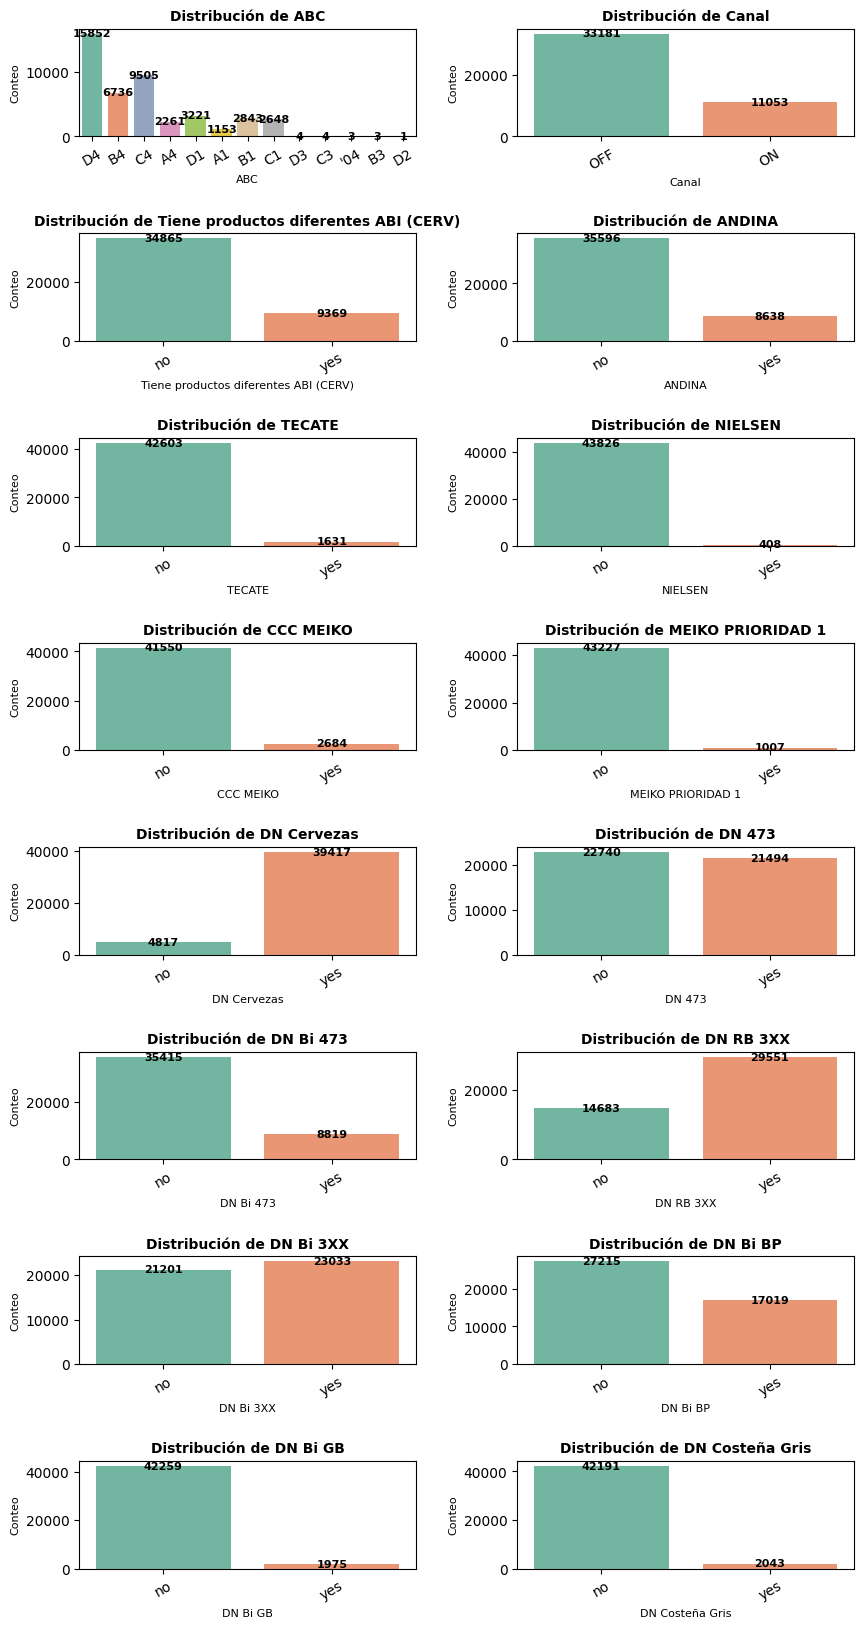

In [190]:
#Visualización de frecuencia de instancias para variables categóricas


num_variables = len(var_cat)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 20))


axes = axes.ravel()


for i, variable in enumerate(var_cat):
    sns.countplot(x=variable, data=df, ax=axes[i], palette="Set2")


    axes[i].set_title(f'Distribución de {variable}', fontsize=10, fontweight='bold')


    axes[i].set_xlabel(variable, fontsize=8)
    axes[i].set_ylabel('Conteo', fontsize=8)


    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', fontweight='bold')


    axes[i].tick_params(axis='x', rotation=30)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.subplots_adjust(wspace=0.3, hspace=0.9)


plt.show()

In [191]:
#Como se observa en la gráfica ubicada en la fila 1, columna 1 las categorías de clientes (ABC) tienen varias clases
#Se determina dejar solo 3 porque el numero que acompaña a la letra ya es obsoleto para el negocio
#Además se eliminan los registros que tengan '04 en dicha columna ya que son clientes nuevos y no se puede
#Clasificar bien su comportamiento pues no hay registros hsitóricos para perfilar

df.loc[(df['ABC'] == 'A1') | (df['ABC'] == 'A4'), 'ABC'] = 'A'
df.loc[(df['ABC'] == 'B1') | (df['ABC'] == 'B3') | (df['ABC'] == 'B4'), 'ABC'] = 'B'
df.loc[(df['ABC'] == 'C1') | (df['ABC'] == 'C3') | (df['ABC'] == 'C4'), 'ABC'] = 'C'
df.loc[(df['ABC'] == 'D1') | (df['ABC'] == 'D2') | (df['ABC'] == 'D3') | (df['ABC'] == 'D4'), 'ABC'] = 'D'

#Se eliminan los registros de clientes nuevos
df = df[~df['ABC'].str.contains("'04")]


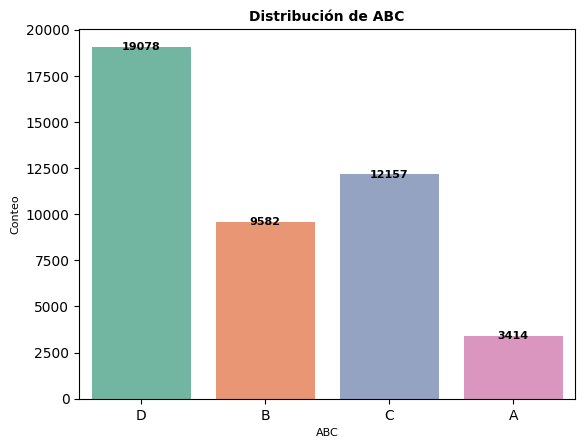

In [192]:
#Se comprueba la distribución de ABC

ABC_DIST = sns.countplot(x='ABC', data=df, palette="Set2")

ABC_DIST.set_title(f'Distribución de ABC', fontsize=10, fontweight='bold')

ABC_DIST.set_xlabel('ABC', fontsize=8)
ABC_DIST.set_ylabel('Conteo', fontsize=8)

for p in ABC_DIST.patches:
    ABC_DIST.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', fontweight='bold')

plt.show()

**VARIABLE DE SALIDA**

In [193]:
# Distribución de variable de salida

df.groupby('Base Foco')['Base Foco'].count().sort_values(ascending=False) # Added 'by' argument with the column name to sort by, for example 'Canal'


,Base Foco
Base Foco,
0,31886
1,12345


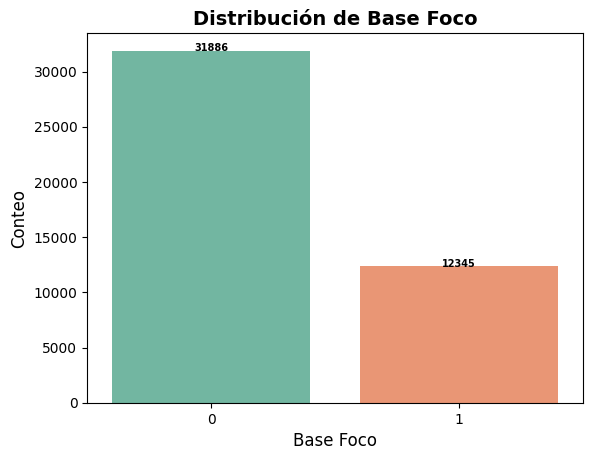

In [194]:
#Gráfica de distribución de variable de salida
variable='Base Foco'
sns.countplot(x=variable, data=df, palette="Set2")

plt.title(f'Distribución de {variable}', fontsize=14, fontweight='bold')
plt.xlabel(variable, fontsize=12)
plt.ylabel('Conteo', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=7, color='black', fontweight='bold')


**CORRELACIÓN ENTRE VARIABLES**

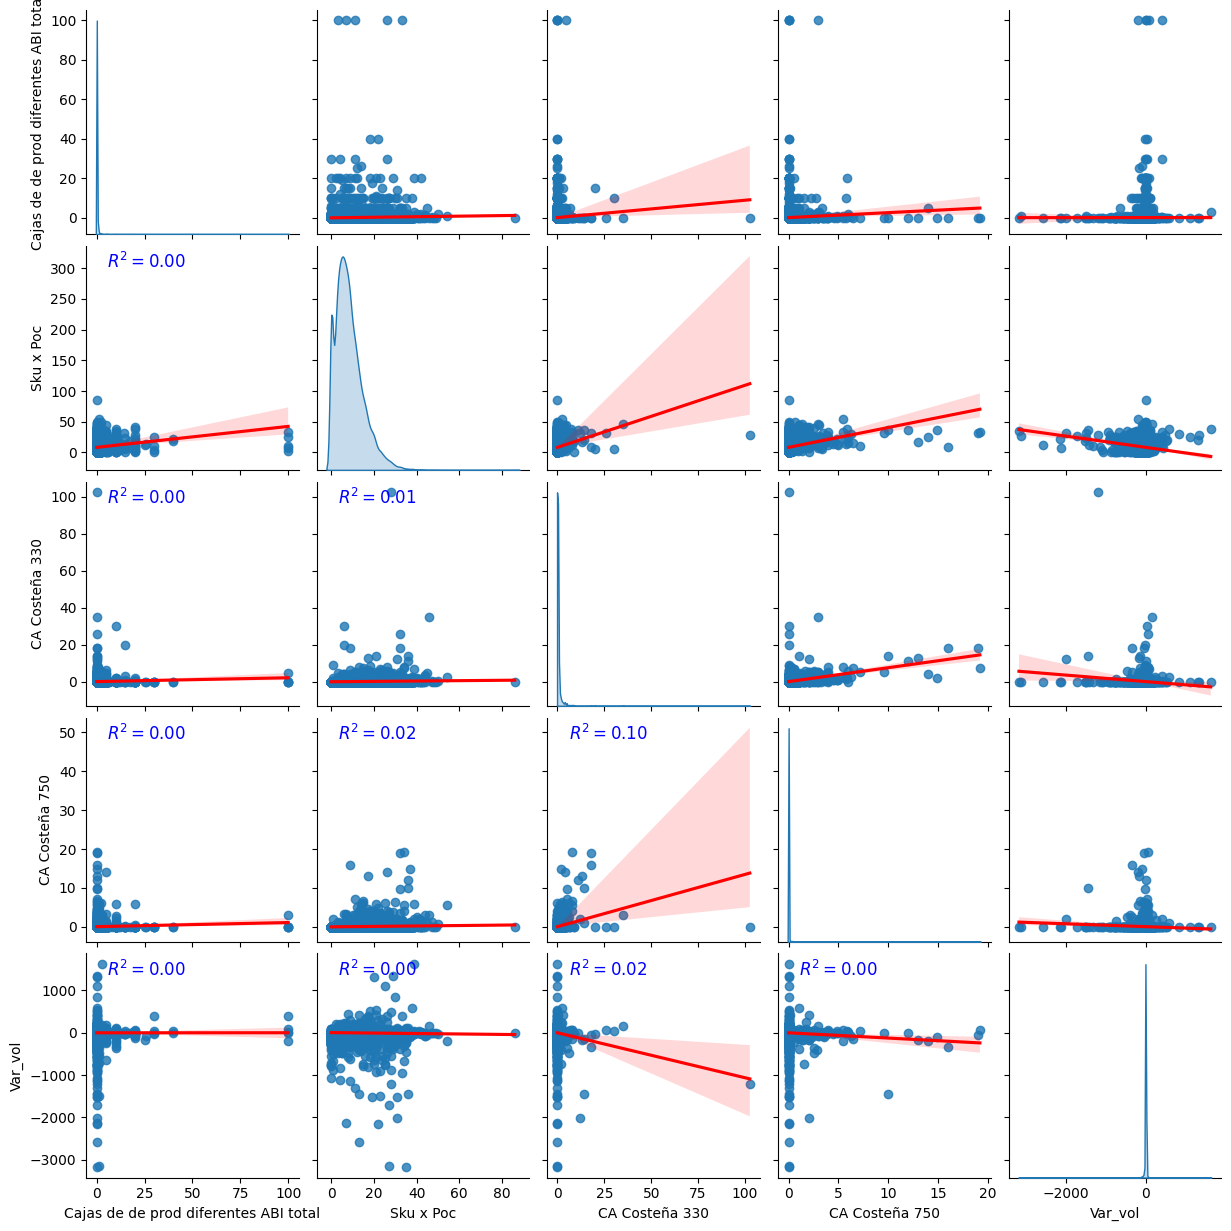

In [195]:
#Visualización de variables numéricas

def corrfunc(x, y, **kws):
    slope, intercept = np.polyfit(x, y, 1)
    r_value = np.corrcoef(x, y)[0, 1] ** 2
    ax = plt.gca()
    ax.annotate(f'$R^2 = {r_value:.2f}$', xy=(0.1, 0.9), xycoords=ax.transAxes, fontsize=12, color='blue')

# Crear el pairplot con gráficos de regresión y KDE (histograma suavizado)
g = sns.pairplot(df[var_num], kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

# Añadir el valor de R² a cada gráfico
g.map_lower(corrfunc)

# Mostrar la gráfica
plt.show()

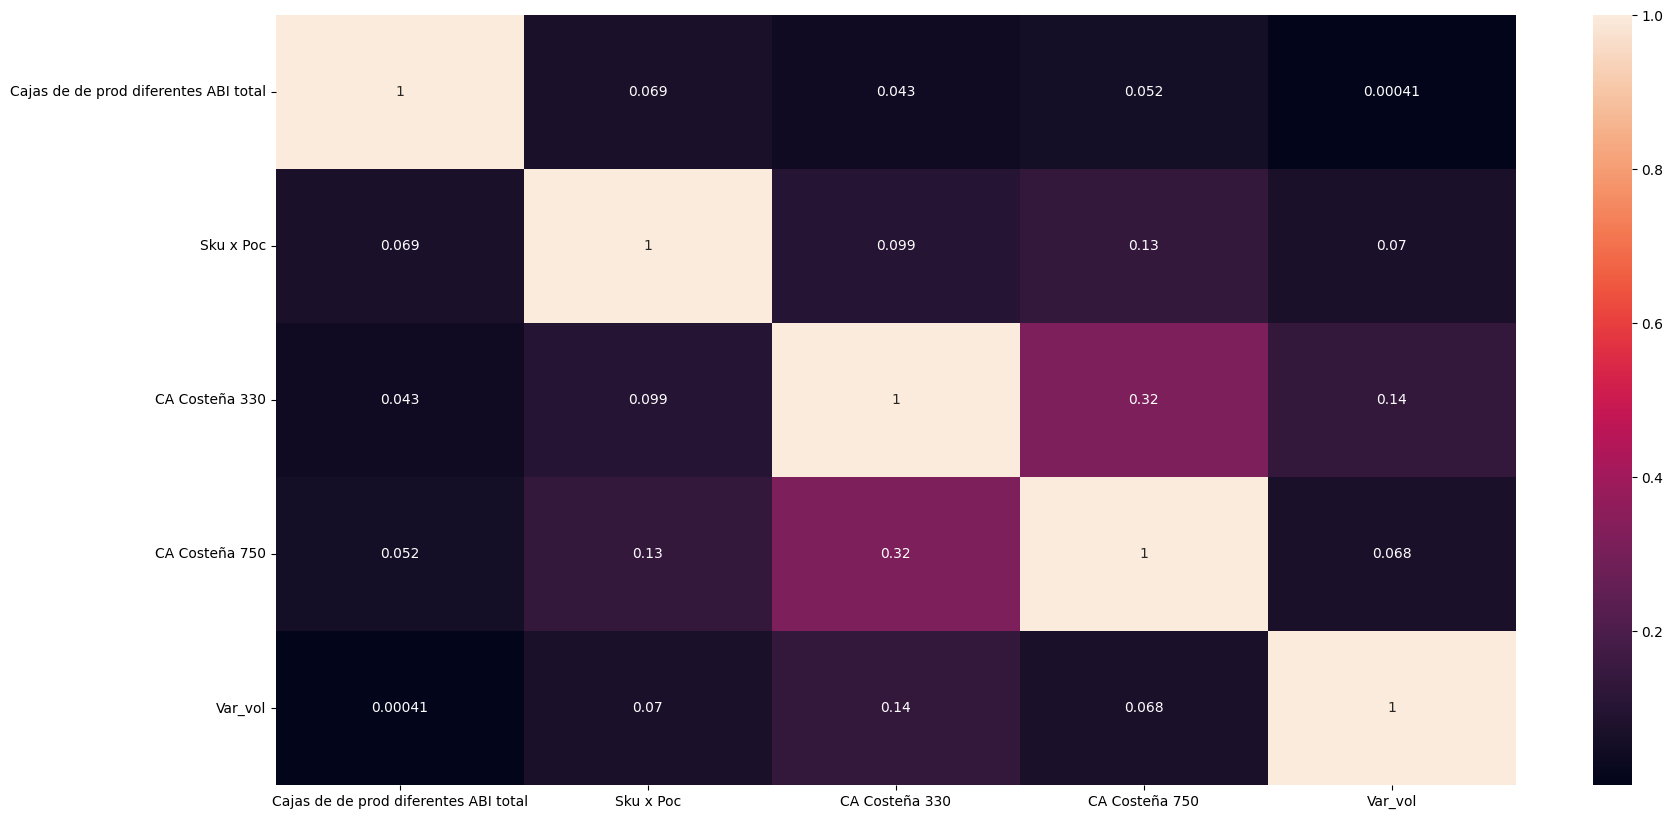

In [196]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[var_num].corr().abs(),  annot=True)
plt.show()

**ESTADÍSTICOS PRINCIPALES**

In [197]:
#Estadísticos principales
df.describe()

,Cajas de de prod diferentes ABI total,Base Foco,Sku x Poc,CA Costeña 330,CA Costeña 750,Var_vol
count,44231.0000,44231.0000,44231.0000,44231.0000,44231.0000,44231.0000
mean,0.1245,0.2791,8.4046,0.0345,0.0173,-5.4192
std,1.3053,0.4486,6.4313,0.6338,0.2678,49.2316
min,0.0000,0.0000,0.0000,0.0000,0.0000,-3181.4500
25%,0.0000,0.0000,4.0000,0.0000,0.0000,-4.5200
50%,0.0000,0.0000,7.0000,0.0000,0.0000,-1.1200
75%,0.0000,1.0000,12.0000,0.0000,0.0000,0.0900
max,100.0000,1.0000,86.0000,102.6000,19.2000,1625.8200


In [198]:
# Calcular asimetría, moda y curtosis
asimetria = df[var_num].apply(skew)
moda = df[var_num].apply(lambda x: mode(x).mode[0] if isinstance(mode(x).mode, np.ndarray) else mode(x).mode)
curtosis_valores = df[var_num].apply(kurtosis)


resumen_estadisticos = pd.DataFrame({
    'Asimetría': asimetria,
    'Moda': moda,
    'Curtosis': curtosis_valores
})

print(resumen_estadisticos)

                                       Asimetría   Moda   Curtosis
Cajas de de prod diferentes ABI total    55.4585 0.0000  3967.7578
Sku x Poc                                 1.1784 0.0000     2.2532
CA Costeña 330                          107.2049 0.0000 15967.8541
CA Costeña 750                           40.4767 0.0000  2224.3758
Var_vol                                 -26.4562 0.0000  1410.2172


## **5. PREPARACIÓN DE DATOS**

**OUTLIERS**

In [199]:
#utilización de LocalOutlierFactor con n vecinos para identificar valores atípicos en las variables numéricas de entrada
#Se elige basándose en la estructira de los datos, para conjuntos de datos grandes (>1000) valor alto entre 10 y 20
#porque mejora la estimación de la densidad local


lof = LocalOutlierFactor(n_neighbors=15)


y_pred = lof.fit_predict(df[var_num])


outliers = y_pred == -1

print('Indices de valores atípicos: ', df[outliers].index.tolist())
len(outliers)

Indices de valores atípicos:  [10, 27, 36, 38, 42, 77, 86, 110, 128, 134, 165, 169, 189, 192, 217, 224, 237, 248, 262, 312, 318, 363, 366, 381, 397, 403, 409, 410, 422, 430, 433, 434, 436, 440, 442, 451, 476, 486, 492, 507, 517, 525, 528, 535, 557, 563, 569, 586, 602, 634, 666, 680, 681, 689, 738, 753, 815, 824, 867, 869, 871, 873, 886, 889, 896, 903, 905, 932, 935, 939, 947, 951, 960, 963, 967, 980, 994, 995, 1073, 1113, 1150, 1161, 1177, 1266, 1269, 1273, 1310, 1327, 1329, 1333, 1338, 1347, 1350, 1352, 1358, 1368, 1393, 1419, 1429, 1431, 1460, 1461, 1495, 1545, 1555, 1556, 1577, 1644, 1696, 1710, 1716, 1728, 1736, 1744, 1746, 1784, 1794, 1813, 1837, 1839, 1881, 1900, 1917, 1921, 1924, 1940, 1976, 1977, 1991, 1997, 2009, 2011, 2052, 2061, 2078, 2132, 2199, 2239, 2263, 2274, 2276, 2304, 2323, 2338, 2339, 2363, 2369, 2371, 2437, 2456, 2472, 2483, 2496, 2497, 2501, 2503, 2519, 2521, 2536, 2558, 2562, 2570, 2589, 2590, 2591, 2612, 2625, 2631, 2634, 2645, 2648, 2662, 2664, 2687, 2688, 2696

44231

In [200]:
# Eliminar los valores atípicos del dataframe original
df = df.loc[~outliers]
df.reset_index(drop=True)
df.shape

(39329, 22)

**VALORES NULOS**

In [201]:
#Se revisa si se requieren imputaciones en valores nulos

# Identificación de valores nulos para las variables numéricas
for col in df[var_num]:
    print (col, np.sum(pd.isnull(df[col])))

Cajas de de prod diferentes ABI total 0
Sku x Poc 0
CA Costeña 330 0
CA Costeña 750 0
Var_vol 0


In [202]:
#Variable de salida

np.sum(pd.isnull(df['Base Foco']))


0

In [203]:
# Identificación de valores nulos para las variables categóricas
for col in df[var_cat]:
    print (col, np.sum(pd.isnull(df[col])))

ABC 0
Canal 0
Tiene productos diferentes ABI (CERV) 0
ANDINA 0
TECATE 0
NIELSEN 0
CCC MEIKO 0
MEIKO PRIORIDAD 1 0
DN Cervezas 0
DN 473 0
DN Bi 473 0
DN RB 3XX 0
DN Bi 3XX 0
DN Bi BP 0
DN Bi GB 0
DN Costeña Gris 0


**SEPARACIÓN DATOS DE PRUEBA Y ENTRENAMIENTO**

In [204]:
#Se hace una primera división de los datos (90% para train y 10% para test)
#obteniéndose df1 para entrenar los modelos y dp1 para la posterior comparación
percentage_first_part = 0.90


n_rows_part1 = int(len(df) * percentage_first_part)

indices_part1 = df.sample(n=n_rows_part1, random_state=123).index


indices_part2 = df.index.difference(indices_part1)


df1 = df.loc[indices_part1]
dp1 = df.loc[indices_part2]

**SOBREMUESTREO**

In [205]:
#Teniendo en cuenta que la variable de salida se encuentra desbalanceada se procede a generar
#datos de manera sintética
oversampler = RandomOverSampler()


X_resampled, y_resampled = oversampler.fit_resample(df1.drop('Base Foco', axis=1), df1['Base Foco'])


df2 = pd.DataFrame(X_resampled, columns=df.columns.drop('Base Foco'))
df3 = pd.DataFrame(y_resampled)


df_final = pd.concat([df2, df3], axis=1)
df_final.shape

(53484, 22)

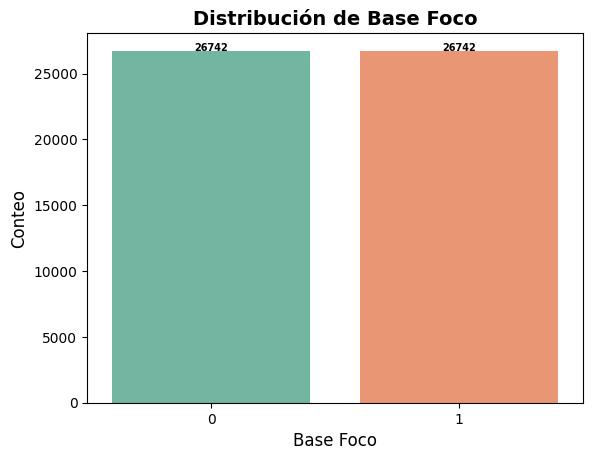

In [206]:
#Gráfica de distribución de variable de salida balanceada
variable='Base Foco'
sns.countplot(x=variable, data=df_final, palette="Set2")

plt.title(f'Distribución de {variable}', fontsize=14, fontweight='bold')
plt.xlabel(variable, fontsize=12)
plt.ylabel('Conteo', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=7, color='black', fontweight='bold')

**DUMMIFICAR**

In [207]:
#Se obtienen variables dummies

df_final=pd.get_dummies(df_final, drop_first=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53484 entries, 0 to 53483
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cajas de de prod diferentes ABI total      53484 non-null  float64
 1   Sku x Poc                                  53484 non-null  int64  
 2   CA Costeña 330                             53484 non-null  float64
 3   CA Costeña 750                             53484 non-null  float64
 4   Var_vol                                    53484 non-null  float64
 5   Base Foco                                  53484 non-null  int64  
 6   ABC_B                                      53484 non-null  bool   
 7   ABC_C                                      53484 non-null  bool   
 8   ABC_D                                      53484 non-null  bool   
 9   Canal_ON                                   53484 non-null  bool   
 10  Tiene productos difere

**SEGUNDA SEPARACIÓN EN DATOS TRAIN Y TEST**

In [208]:
#DIVISION DE LOS DATOS EN ENTRENAMIENTO Y TEST EN UN 80% TRAIN Y 20% TEST


X = df_final.drop(columns ='Base Foco')
y = df_final['Base Foco']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

**ESCALADO DE VARIABLES NUMÉRICAS**

In [209]:
#ESCALAR VARIABLES NUMERICAS PERO SIN LA VARIABLE DE SALIDA


numCols = df_final.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
numCols.remove('Base Foco')
num_vars = numCols
print(num_vars)


pd.set_option('display.float_format', lambda x: '%.4f' % x)


scaler = MinMaxScaler()


X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test[num_vars].head(2)

['Cajas de de prod diferentes ABI total', 'Sku x Poc', 'CA Costeña 330', 'CA Costeña 750', 'Var_vol']


,Cajas de de prod diferentes ABI total,Sku x Poc,CA Costeña 330,CA Costeña 750,Var_vol
14731,0.0000,0.0000,0.0000,0.0000,0.6636
47433,0.0000,0.3488,0.0000,0.0000,0.6650


**PREPARACIÓN DE DATOS VALIDACIÓN CRUZADA**

In [210]:
#DATOS PARA VALIDACIÓN CRUZADA
#Las validaciones cruzadas para calibración de hiperparámetros de modelos se hará con el dataset completo

X = df_final.drop(columns ='Base Foco')
y = df_final['Base Foco']


X_Completo = X
y_Completo = y

In [211]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)


numCols = df_final.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
numCols.remove('Base Foco')
num_vars = numCols
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])
X_Completo[num_vars].head(2)

,Cajas de de prod diferentes ABI total,Sku x Poc,CA Costeña 330,CA Costeña 750,Var_vol
0,0.0000,0.4545,0.0000,0.0000,0.6554
1,0.0020,0.1591,0.0000,0.0000,0.6621
